Install Packages

In [ ]:
!pip install opendatasets
!pip install pandas
!pip install kaggle


# **Import Dataset and Libraries**


In [ ]:
# Import libraries for data loading
import os
import random

# Import libraries for data operations
import numpy as np
import pandas as pd
import math

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import textwrap


# Import libraries for feature engineering
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Import libraries for model creation
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

# Import libraries for model training
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Import libraries for pre-trained model
from tensorflow.keras.applications import InceptionV3

# Import libraries for warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import opendatasets as od
import pandas

import os
import opendatasets as od

# Automatically input API of Kaggle
os.environ["KAGGLE_USERNAME"] = "stevennnnvtec"
os.environ["KAGGLE_KEY"] = "9fd6186339cc3dff6ecb329beeccd852"
from kaggle import api

api.dataset_download_files("sumn2u/garbage-classification-v2", path="data", unzip=True)
dataset_path = "/content/data/garbage-dataset"

# Classes
classes = ["metal", "glass", "biological", "paper", "battery", "cardboard", "shoes", "clothes", "plastic", "trash" ]

Dataset URL: https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2


In [ ]:
# Define the paths for each class
class_paths = {cls: os.path.join(dataset_path, cls) for cls in classes}

# Function to list files in a directory
def list_files(directory_path):
    return os.listdir(directory_path)

# List files in each directory
print("Paths to dataset folder:")
print("Dataset Path:", dataset_path)
print("\nFiles in each folder:")
for cls, path in class_paths.items():
    files = list_files(path)
    print(f"\n{cls}:")
    for file in files[:5]:  # Display only the first 5 files
        print(f"  - {file}")
    if len(files) > 5:
        print(f"  ... and {len(files) - 5} more files")

Paths to dataset folder:
Dataset Path: /content/data/garbage-dataset

Files in each folder:

metal:
  - metal_1521.jpg
  - metal_2369.jpg
  - metal_2266.jpg
  - metal_2077.jpg
  - metal_20242.jpg
  ... and 1015 more files

glass:
  - glass_4651.jpg
  - glass_2675.jpg
  - glass_803.jpg
  - glass_2104.jpg
  - glass_2226.jpg
  ... and 3056 more files

biological:
  - biological_973.jpg
  - biological_685.jpg
  - biological_112.jpg
  - biological_381.jpg
  - biological_55.jpg
  ... and 992 more files

paper:
  - paper_1443.jpg
  - paper_1209.jpg
  - paper_784.jpg
  - paper_1716.jpg
  - paper_2656.jpg
  ... and 1675 more files

battery:
  - battery_467.jpg
  - battery_591.jpg
  - battery_922.jpg
  - battery_624.jpg
  - battery_257.jpg
  ... and 939 more files

cardboard:
  - cardboard_1655.jpg
  - cardboard_1068.jpg
  - cardboard_1952.jpg
  - cardboard_196.jpg
  - cardboard_8.jpg
  ... and 1820 more files

shoes:
  - shoes_57.jpg
  - shoes_173.jpg
  - shoes_307.jpg
  - shoes_801.jpg
  - sho

In [ ]:
# Function to count files in a folder
def count_files(folder_path):
    file_list = os.listdir(folder_path)
    return len(file_list)

# Create a dictionary with class names and counts
classes_dict = {cls: count_files(class_paths[cls]) for cls in classes}

# Create a DataFrame from the dictionary
classes_df = pd.DataFrame.from_dict(classes_dict, orient='index', columns=['Number of Images'])

# Sort the DataFrame by 'Number of Images' in descending order
classes_df_sorted = classes_df.sort_values('Number of Images', ascending=False)

# Display the sorted DataFrame
classes_df_sorted

,Number of Images
clothes,5327
glass,3061
plastic,1984
shoes,1977
cardboard,1825
paper,1680
metal,1020
biological,997
trash,947
battery,944


In [ ]:
# Define path list
path_list = [class_paths[cls] for cls in classes]

# Create empty list of image path and class
image_path = []
class_labels = []

# Iterate through all of the images in the path list to extract path and class
for i, dir_path in enumerate(path_list):
    image_names = os.listdir(dir_path)
    for name_file in image_names:
        full_image_path = os.path.join(dir_path, name_file)
        image_path.append(full_image_path)
        class_labels.append(classes[i])

# Create a dataframe
df = pd.DataFrame({
    "Image_Path": image_path,
    "Class": class_labels
})

# Show the first 5 rows
df.head()

,Image_Path,Class
0,/content/data/garbage-dataset/metal/metal_1521...,metal
1,/content/data/garbage-dataset/metal/metal_2369...,metal
2,/content/data/garbage-dataset/metal/metal_2266...,metal
3,/content/data/garbage-dataset/metal/metal_2077...,metal
4,/content/data/garbage-dataset/metal/metal_2024...,metal


# **Exploratory Data Analysis**



1.   Image Visualization





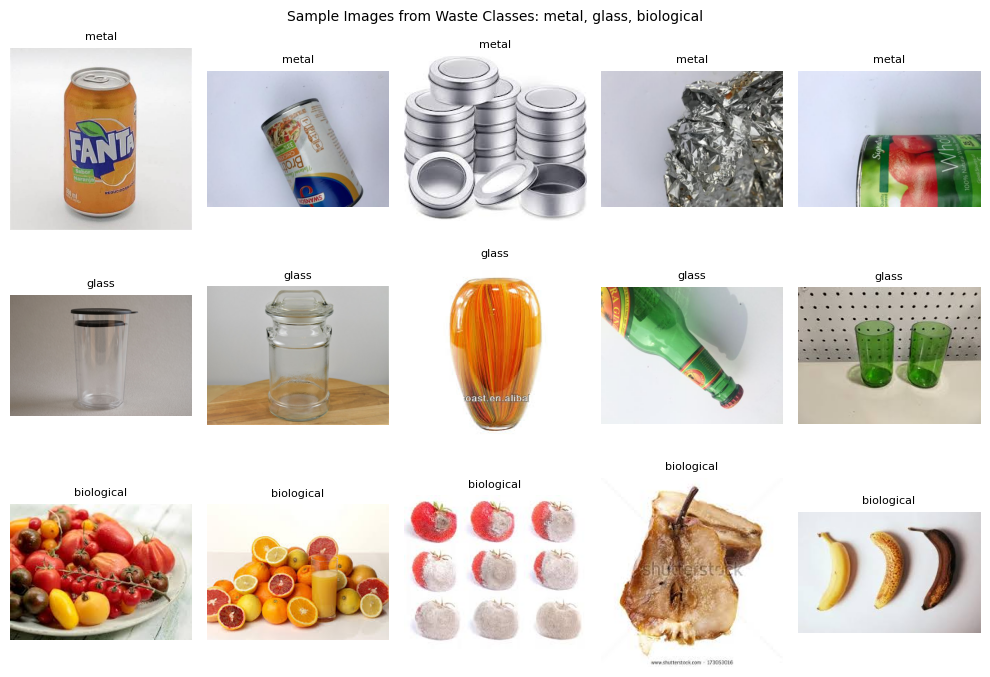

In [ ]:
# Set a fixed random seed
random.seed(42)
np.random.seed(42)

# Extract 5 samples from each class
sampled_df = pd.concat([df[df['Class'] == cls].sample(5, random_state=42) for cls in classes])

def plot_waste_images(class_names):
    # Create a 3x5 grid of subplots
    fig, axes = plt.subplots(3, 5, figsize=(10, 7))
    # Set the main title for the entire figure
    fig.suptitle(f'Sample Images from Waste Classes: {", ".join(class_names)}', fontsize=10)

    # Iterate through the specified waste classes
    for i, cls in enumerate(class_names):
        # Select samples for the current class
        class_samples = sampled_df[sampled_df['Class'] == cls]

        # Plot five images for each class
        for j, (_, row) in enumerate(class_samples.iterrows()):
            # Read the image and convert from BGR to RGB
            img = cv2.imread(row['Image_Path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Display the image in the appropriate subplot
            axes[i, j].imshow(img)
            axes[i, j].set_title(cls, fontsize=8)
            axes[i, j].axis('off')  # Remove axis ticks and labels

    # Adjust the layout and spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    # Display the plot
    plt.show()

# Plot first 3 classes
plot_waste_images(classes[:3])

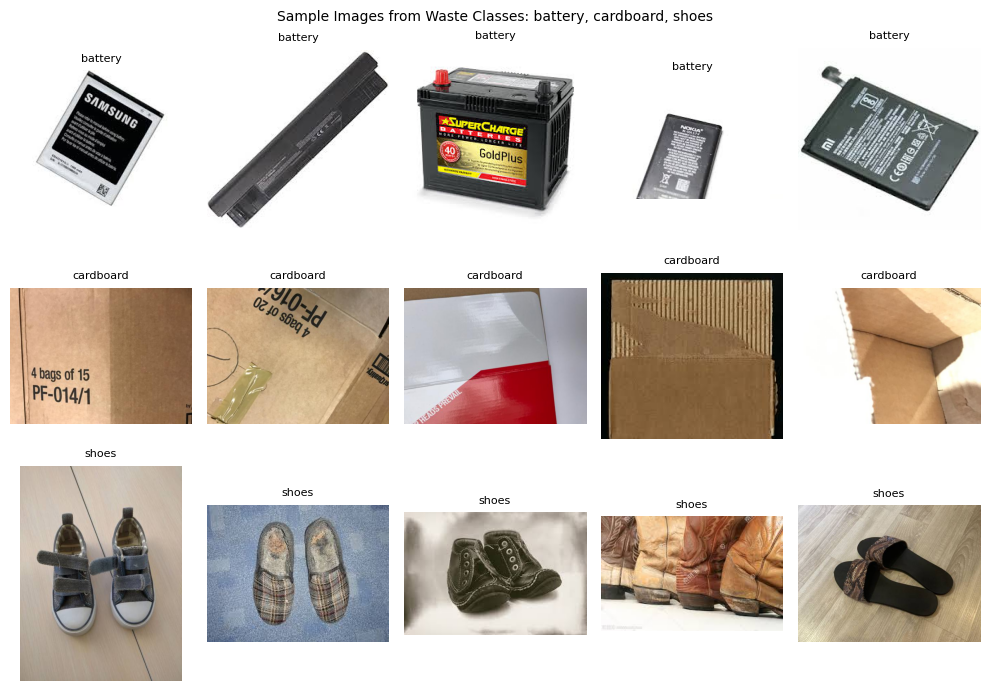

In [ ]:
plot_waste_images(classes[4:7])

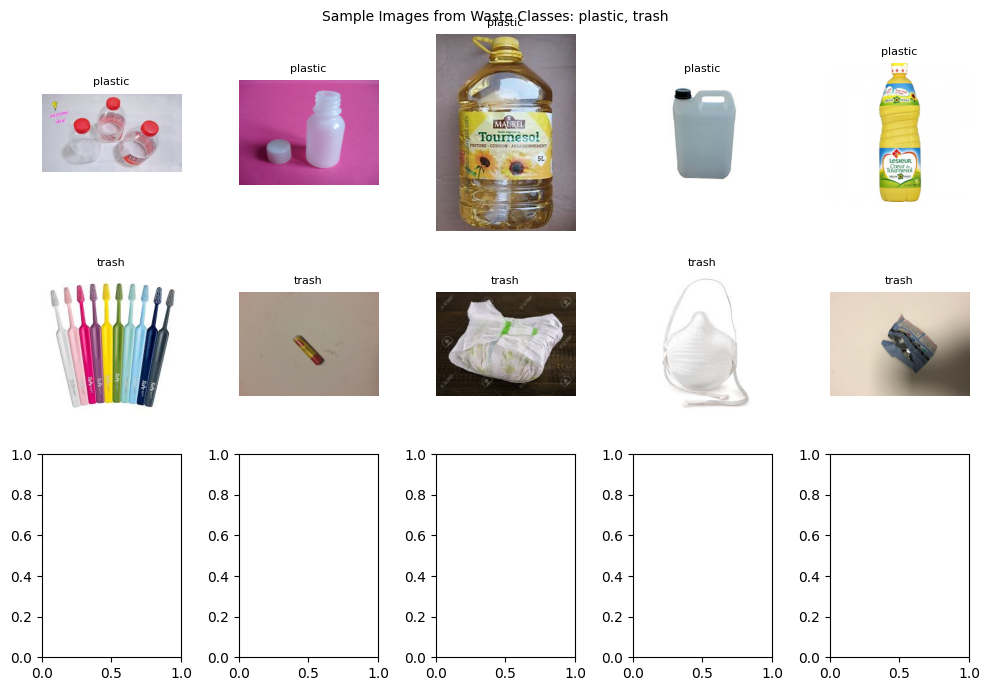

In [ ]:
plot_waste_images(classes[8:])



2.   Class Distribution




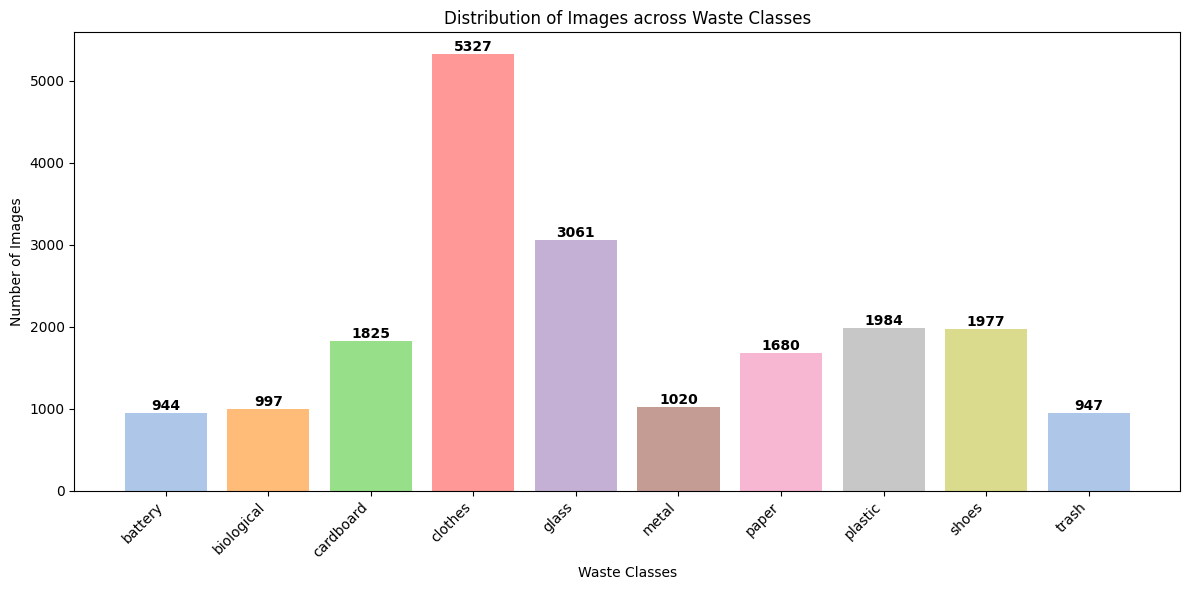

In [ ]:
# Counts occurrences of each class
class_counts = df['Class'].value_counts().sort_index()

# Define list of colors for 9 classes (lighter palette)
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']

# Plot the graph
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Waste Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Waste Classes')

# Add the number of counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

In [ ]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    img = cv2.imread(image_path)
    return img.shape[:2]  # Returns (height, width)

df['Dimension'] = df['Image_Path'].apply(get_image_dimensions)
df['Dimension'].value_counts()

,count
Dimension,
"(533, 400)",2591
"(384, 512)",2524
"(225, 225)",1924
"(534, 400)",1077
"(183, 275)",671
...,...
"(375, 474)",1
"(377, 565)",1
"(240, 475)",1


# **Feature Engineering**

1. Split Train, Validation and Test sets


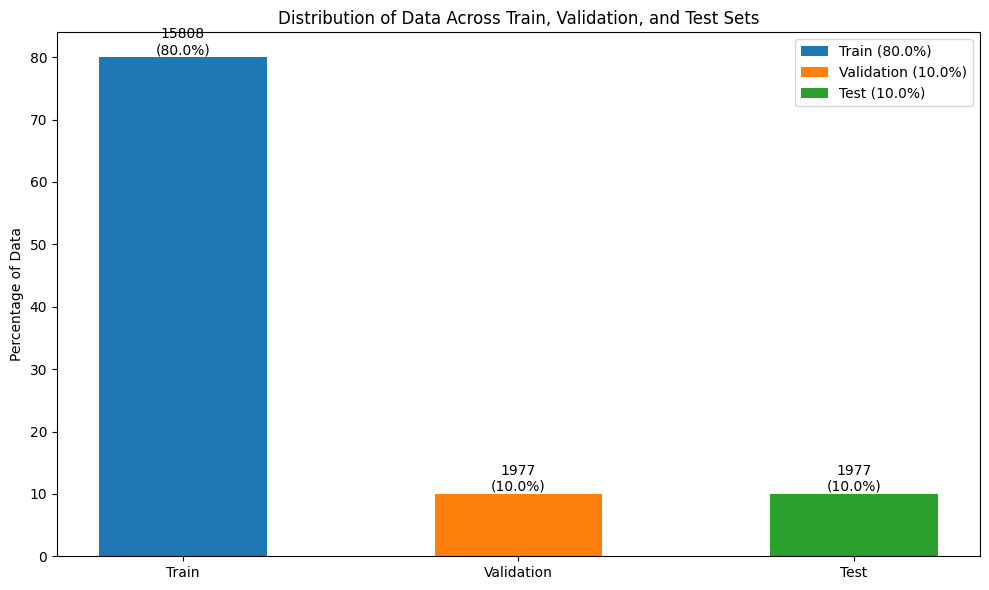

In [ ]:
# Define ratio
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# Split train and test first
df_train_val, df_test = train_test_split(df, test_size=test_ratio, stratify=df['Class'], random_state=42)

# Then split train_val into train and validation
df_train, df_val = train_test_split(df_train_val, test_size=val_ratio/(train_ratio+val_ratio), stratify=df_train_val['Class'], random_state=42)

# Prepare data for visualization
datasets = [df_train, df_val, df_test]
names = ['Train', 'Validation', 'Test']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(names))
total = len(df)
widths = [len(d) / total for d in datasets]

for i, (dataset, name, color) in enumerate(zip(datasets, names, colors)):
    count = len(dataset)
    percentage = count / total * 100
    ax.bar(i, percentage, width=0.5, color=color, label=f'{name} ({percentage:.1f}%)')
    ax.text(i, percentage, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_ylabel('Percentage of Data')
ax.set_title('Distribution of Data Across Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.tight_layout()
plt.show()

2. Data Preprocessing

In [ ]:
# Define image size and batch size
width = 299
height = 299
image_size = (width, height)

In [ ]:
# Define generator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,        # Randomly rotate images in the range (degrees) -< 90
    shear_range=45,           # Shear angle in counter-clockwise direction in degrees -< 45
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill in new pixels
)

# Define generator for validation and testing (only rescaling, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 15808 validated image filenames belonging to 10 classes.
Found 1977 validated image filenames belonging to 10 classes.
Found 1977 validated image filenames belonging to 10 classes.


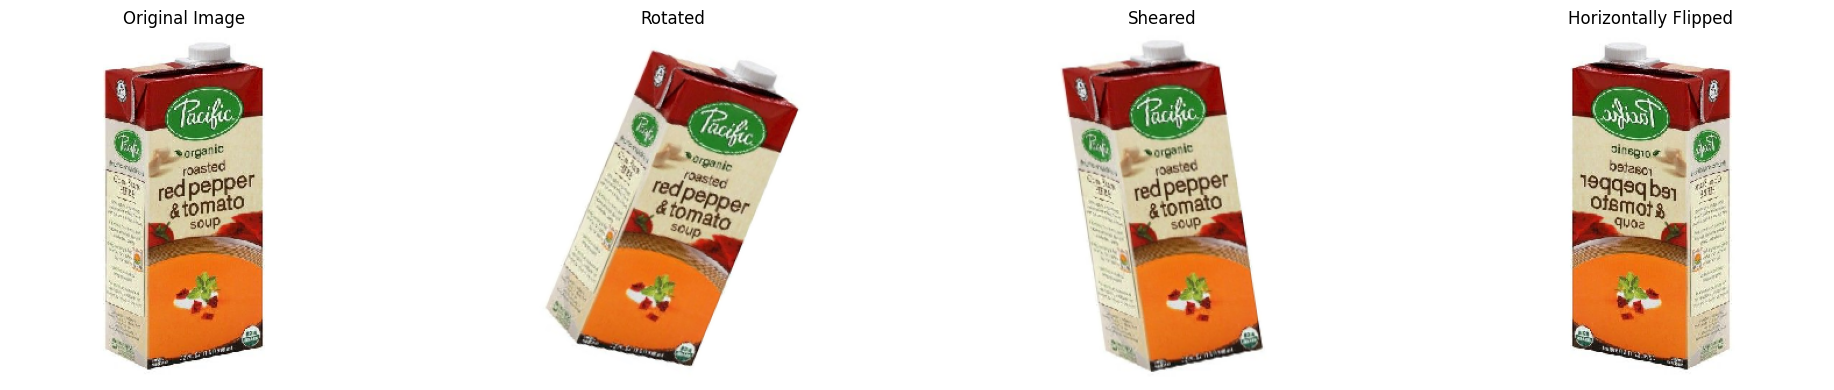

Class of the displayed image: cardboard


In [ ]:
def plot_images(original_image, augmented_images, augmentation_types):
    n = len(augmented_images)
    plt.figure(figsize=(20, 4))
    plt.subplot(1, n+1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    for i in range(n):
        plt.subplot(1, n+1, i+2)
        plt.imshow(augmented_images[i])
        plt.title(augmentation_types[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load a specific image
image_path = df_train['Image_Path'].iloc[69]  # Using the image number 69 (lol) in df_train
original_image = load_img(image_path, target_size=image_size)
original_image_array = img_to_array(original_image) / 255.0  # Normalize to [0,1]

# Create separate image generators for each augmentation
rotation_gen = ImageDataGenerator(rotation_range=90)
shear_gen = ImageDataGenerator(shear_range=45)

# Generate augmented images
rotated_image = rotation_gen.random_transform(original_image_array)
sheared_image = shear_gen.random_transform(original_image_array)

# Force horizontal flip
flipped_image = np.fliplr(original_image_array)

# Combine augmented images and their labels
augmented_images = [rotated_image, sheared_image, flipped_image]
augmentation_types = ['Rotated', 'Sheared', 'Horizontally Flipped']

# Plot original and augmented images
plot_images(original_image, augmented_images, augmentation_types)

# Print the class of the selected image
class_name = df_train['Class'].iloc[69]
print(f"Class of the displayed image: {class_name}")

# **ANN Training**

1. Model Definition


In [ ]:
# Clear Session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create the model
lubu_players_model = Sequential()

# First Conv Block
lubu_players_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(299, 299, 3)))
lubu_players_model.add(BatchNormalization())
lubu_players_model.add(ReLU())
lubu_players_model.add(MaxPooling2D((2, 2)))

# Second Conv Block
lubu_players_model.add(Conv2D(64, (3, 3), padding='same'))
lubu_players_model.add(BatchNormalization())
lubu_players_model.add(ReLU())
lubu_players_model.add(MaxPooling2D((2, 2)))

# Third Conv Block
lubu_players_model.add(Conv2D(128, (3, 3), padding='same'))
lubu_players_model.add(BatchNormalization())
lubu_players_model.add(ReLU())
lubu_players_model.add(MaxPooling2D((2, 2)))

# Global Average Pooling
lubu_players_model.add(GlobalAveragePooling2D())

# Fully connected layers
lubu_players_model.add(Dense(256, activation='relu'))
lubu_players_model.add(Dropout(0.5))

# Output layer
lubu_players_model.add(Dense(10, activation='softmax'))  # 9 classes for waste classification

# Compile the model
lubu_players_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
# Display the model summary
lubu_players_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 299, 299, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 299, 299, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 299, 299, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 149, 149, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 149, 149, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 149, 149, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 74, 74, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,738 (506.79 KB)

 Trainable params: 129,290 (505.04 KB)

 Non-trainable params: 448 (1.75 KB)

2. Model Training

In [ ]:
# Define classes
classes = list(train_generator.class_indices.keys())

# Apply class weight to handle imbalance data
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(train_generator.classes),
                                                  y = train_generator.classes)

train_class_weights = dict(enumerate(class_weights))

for idx, weight in train_class_weights.items():
    class_name = classes[idx]
    print(f"{class_name} : {weight:.2f}")

battery : 2.09
biological : 1.98
cardboard : 1.08
clothes : 0.37
glass : 0.65
metal : 1.94
paper : 1.18
plastic : 1.00
shoes : 1.00
trash : 2.09


In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Train the model
history_lubu_players_model = lubu_players_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=train_class_weights,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
# Draw Val vs Val - loss figure and Accuracy vs Val - accuracy figure
history_lubu_players_model_df = pd.DataFrame(history_lubu_players_model.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_lubu_players_model_df[['loss', 'val_loss']])
plt.title('Loss vs Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_lubu_players_model_df[['accuracy', 'val_accuracy']])
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Check the performance of train-set
# Get the probability predictions
y_pred_prob_train = lubu_players_model.predict(train_generator)

# Get class with maximum probability
y_pred_class_train = np.argmax(y_pred_prob_train, axis=-1)

# Get the true labels from the train data generator
y_true_train = train_generator.classes

# Get the class names from the training data generator
class_names = list(train_generator.class_indices.keys())

# Display Classification Report
print("Classification Report for Training Set:")
print(classification_report(y_true_train, y_pred_class_train, target_names=class_names))

In [ ]:
# Check the performance of test-set
# Get the probability predictions
y_pred_prob = lubu_players_model.predict(test_generator)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class names from the testing data generator
class_names = list(test_generator.class_indices.keys())

# Display Classification Report
print("Classification Report for Test Set:")
print(classification_report(y_true, y_pred_class, target_names=class_names))

# ANN Improvement (Transfer Training)


1. Model Definition

In [ ]:
# Clear Session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Load the pre-trained InceptionV3 model, exclude top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze all layers except the last 5 layers
for layer in base_model.layers[:-5]:  # Unfreeze the last 5 layers for fine-tuning
    layer.trainable = False

# Build the model
model = Sequential()

# Add the base pre-trained model
model.add(base_model)

# Add global average pooling to reduce the output dimensions
model.add(GlobalAveragePooling2D())

# Add a fully connected layer with dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% probability to reduce overfitting

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# summary of transfer learning model
model.summary()

2. Model Training

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=train_class_weights,
    callbacks=[early_stopping],
    verbose=1
)

In [ ]:
# Plot training results

history_model_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_df[['loss', 'val_loss']])
plt.title('Loss vs Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_df[['accuracy', 'val_accuracy']])
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Check the performance of train-set
# Get the probability predictions
y_pred_prob_train = model.predict(train_generator)

# Get class with maximum probability
y_pred_class_train = np.argmax(y_pred_prob_train, axis=-1)

# Get the true labels from the train data generator
y_true_train = train_generator.classes

# Get the class names from the training data generator
class_names = list(train_generator.class_indices.keys())

# Display Classification Report
print(classification_report(y_true_train, y_pred_class_train, target_names=class_names))

In [ ]:
# Check the performance of test-set
# Get the probability predictions
y_pred_prob = model.predict(test_generator)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class names from the testing data generator
class_names = list(test_generator.class_indices.keys())

# Display Classification Report
print(classification_report(y_true, y_pred_class, target_names=class_names))

In [ ]:
# Generate the confusion matrices
cm_train = confusion_matrix(y_true_train, y_pred_class_train)
cm_test = confusion_matrix(y_true, y_pred_class)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrix for the training data
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for the test data
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix - Test Data')

# Display the plots
plt.tight_layout()
plt.show()